In [1]:
# Data:

# Average of TR5_0i_max : Outlet Temperature of 'i'th gasifier
# Average of 03_fi_1i08.DACA.PV : HP BFW Flow of 'i'th gasifier
# CH4_hr avg : Average Methane composition produced per hour
# Average of 03_TIC_1i08.DACA.PV : Ash lock Temperature of 'i'th gasifier
# Average of 08_PIC_1104.DACA.PV : Header Pressure
# CO2_GG-0i : CO2 composition produced per hour by 'i'th gasifier
# Load_GG-10i : HP O2 Flow in 'i'th gasifier
# Count : Number of Gasifiers in Operation
# VM(wt%) : Volatile Matter percentage
# ASH(wt%) : Ash percentage
# FC(wt%) : Fixed Carbon percentage

In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib

In [3]:
print('NumPy',np.__version__)
print("Pandas",pd.__version__)
print("Matplotlib",matplotlib.__version__)
print("Seaborn",sns.__version__)
print("Scikit-learn",sklearn.__version__)

NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.8.2
Seaborn 0.13.2
Scikit-learn 1.3.1


In [4]:
#import the data
df = pd.read_excel('Tab_Data - Copy-Updated.xlsx',skiprows=1)

In [5]:
df  

,S.No,Date,Time,Average of Avg Load,Average of TR5_01_max,Average of TR5_02_max,Average of TR5_03_max,Average of TR5_04_max,Average of TR5_05_max,Average of TR5_06_max,...,Load_GG-106,Load_GG-107,Count,Total HP BFW,Date_1,Time_1,ID,VM(wt%),ASH(wt%),FC(wt%)
0,1,2023-12-31,10 PM,5666.146842,306.082167,0.000000,515.455833,562.710833,486.609333,482.632667,...,7210.417667,10.383333,4,29.266500,2023-12-31,10 PM,31-12-2023 22,35.15,26.75,32.28
1,2,2023-12-31,11 PM,5372.799200,305.022667,0.000000,535.256833,583.421000,561.395333,506.454500,...,7520.071833,9.890833,5,27.802167,2023-12-31,11 PM,31-12-2023 23,35.15,26.75,32.28
2,3,2024-01-01,12 AM,5130.564100,344.409833,0.000000,522.242833,518.541833,558.683833,515.729333,...,7596.306000,9.860167,5,29.594167,2024-01-01,12 AM,01-01-2024 00,35.15,26.75,32.28
3,4,2024-01-01,1 AM,4926.512900,391.349667,0.000000,533.887000,493.118167,498.174500,520.971333,...,7505.195167,8.457667,5,30.508667,2024-01-01,1 AM,01-01-2024 01,35.15,26.75,32.28
4,5,2024-01-01,2 AM,5045.142400,434.926333,0.000000,554.247667,449.392167,539.247833,569.762667,...,7502.496167,8.547500,5,32.527000,2024-01-01,2 AM,01-01-2024 02,33.30,28.54,32.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,2900,2024-04-30,1900-01-01 16:59:50,4612.633206,318.194130,552.747780,362.482491,478.780125,361.273904,0.000000,...,0.556653,16.047940,5,23.695452,2024-04-30,1900-01-01 16:59:50,30-04-2024 17,35.66,25.92,33.45
2900,2901,2024-04-30,1900-01-01 17:59:50,4321.878770,315.407911,533.281661,336.402878,445.765880,333.949318,0.000000,...,-1.368609,16.655965,5,25.539279,2024-04-30,1900-01-01 17:59:50,30-04-2024 18,35.66,25.92,33.45
2901,2902,2024-04-30,1900-01-01 18:59:50,4439.261580,311.185478,552.318743,331.911571,420.256787,316.160745,0.000000,...,-0.349180,16.350858,5,25.488441,2024-04-30,1900-01-01 18:59:50,30-04-2024 19,32.15,29.39,31.20
2902,2903,2024-04-30,1900-01-01 19:59:50,4383.122669,309.569939,506.935099,307.381930,427.069065,320.863501,0.000000,...,-1.072661,16.491935,5,26.396322,2024-04-30,1900-01-01 19:59:50,30-04-2024 20,32.15,29.39,31.20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   S.No                            2904 non-null   int64         
 1   Date                            2904 non-null   datetime64[ns]
 2   Time                            2837 non-null   object        
 3   Average of Avg Load             2904 non-null   float64       
 4   Average of TR5_01_max           2904 non-null   float64       
 5   Average of TR5_02_max           2904 non-null   float64       
 6   Average of TR5_03_max           2904 non-null   float64       
 7   Average of TR5_04_max           2904 non-null   float64       
 8   Average of TR5_05_max           2904 non-null   float64       
 9   Average of TR5_06_max           2904 non-null   float64       
 10  Average of TR5_07_max           2904 non-null   float64       
 11  Aver

In [7]:
#dropping unnecessary columns
df = df.drop(['S.No','Date','Time','Date_1','Time_1','ID','Total HP BFW','Average of Avg Load'],axis=1)

In [8]:
df.describe()

,Average of TR5_01_max,Average of TR5_02_max,Average of TR5_03_max,Average of TR5_04_max,Average of TR5_05_max,Average of TR5_06_max,Average of TR5_07_max,Average of 03_fi_1008.DACA.PV,Average of 03_fi_1208.DACA.PV,Average of 03_fi_1308.DACA.PV,...,Load_GG-102,Load_GG-103,Load_GG-104,Load_GG-105,Load_GG-106,Load_GG-107,Count,VM(wt%),ASH(wt%),FC(wt%)
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,...,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,310.919104,262.344823,296.050481,354.147340,366.305550,202.771580,277.645274,3.718809,2.501023,3.108235,...,2319.948909,3256.569753,3125.016965,3999.478639,2420.837268,2380.397084,4.536157,34.013567,26.911574,33.943454
std,131.664422,221.605284,166.873414,173.753543,110.446849,198.495090,177.536649,2.292502,2.524785,2.258970,...,2329.987574,2386.727408,2021.314689,1749.243230,2750.073149,2271.742211,1.346101,1.557516,2.992311,2.052020
min,38.727333,-2.900000,35.621968,0.000000,84.597565,0.000000,24.169500,0.006106,-0.664016,-0.010452,...,-28.623789,-26.741521,18.546000,17.534202,-25.674204,-3.755847,0.000000,24.960000,19.480000,26.700000
25%,261.532801,29.131963,91.848336,221.974268,333.576207,0.000000,96.448723,2.473376,-0.183117,0.000000,...,-14.889336,-1.878693,47.153754,3560.259977,-17.308670,12.083278,5.000000,33.130000,24.740000,32.660000
50%,339.714625,352.812251,348.895596,417.632591,382.174000,107.057937,358.583583,4.397211,2.904913,3.964446,...,2503.778825,4273.097628,3893.190322,4497.543083,-1.890719,2933.098583,5.000000,34.180000,26.745000,34.020000
75%,398.286108,464.441857,417.946379,471.862830,431.538509,370.160635,431.469983,5.215057,4.527340,4.849762,...,4530.028366,5176.091256,4693.406173,5077.066520,5147.368953,4589.269061,5.000000,35.055000,28.960000,35.120000
max,681.477167,722.000000,657.011553,721.152667,685.982476,682.265000,660.597636,13.423622,17.173046,10.234147,...,6744.445833,7630.088249,7017.150789,7220.829500,7975.380500,6700.691252,6.000000,37.650000,37.570000,46.130000


In [9]:
# Drop rows where 'Count' column has the value 0 ( No gasifier is operational on that day)
df = df[df['Count'] != 0]

In [10]:
#Imputing the missing values
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=10, weights="uniform")
df_imputed = knn.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average of TR5_01_max           2757 non-null   float64
 1   Average of TR5_02_max           2757 non-null   float64
 2   Average of TR5_03_max           2757 non-null   float64
 3   Average of TR5_04_max           2757 non-null   float64
 4   Average of TR5_05_max           2757 non-null   float64
 5   Average of TR5_06_max           2757 non-null   float64
 6   Average of TR5_07_max           2757 non-null   float64
 7   Average of 03_fi_1008.DACA.PV   2757 non-null   float64
 8   Average of 03_fi_1208.DACA.PV   2757 non-null   float64
 9   Average of 03_fi_1308.DACA.PV   2757 non-null   float64
 10  Average of 03_fi_1408.DACA.PV   2757 non-null   float64
 11  Average of 03_fi_1508.DACA.PV   2757 non-null   float64
 12  Average of 03_fi_1608.DACA.PV   27

In [12]:
#Calculation of the weighted average of the 7 individual gasifier parameter columns

def calculate_weighted_average(data,Count):
    parameter_columns = [col for col in data.columns]
    print(parameter_columns)

    weighted_averages = []

    for i, row in data.iterrows():
        count = int(Count[i])

        # Get the parameter values for the current row
        parameter_values = row[parameter_columns]

        # Get the top 'count' values from the parameter columns
        top_values = parameter_values.nlargest(count)

        # Calculate the mean of the top 'count' values
        top_values_mean = top_values.mean()
        weighted_averages.append(top_values_mean)

    return weighted_averages

In [13]:
#calculating weighted average

TR5_data = df[['Average of TR5_01_max','Average of TR5_02_max','Average of TR5_03_max','Average of TR5_04_max','Average of TR5_05_max','Average of TR5_06_max','Average of TR5_07_max']]
HP_BFW_data = df[['Average of 03_fi_1008.DACA.PV','Average of 03_fi_1208.DACA.PV','Average of 03_fi_1308.DACA.PV','Average of 03_fi_1408.DACA.PV','Average of 03_fi_1508.DACA.PV','Average of 03_fi_1608.DACA.PV','Average of 03_fi_1708.DACA.PV']]
TR4_data = df[['Average of 03_TIC_1008.DACA.PV','Average of 03_TIC_1208.DACA.PV','Average of 03_TIC_1308.DACA.PV','Average of 03_TIC_1408.DACA.PV','Average of 03_TIC_1508.DACA.PV','Average of 03_TIC_1608.DACA.PV','Average of 03_TIC_1708.DACA.PV']]
CO2_data = df[['CO2_GG-01','CO2_GG-02','CO2_GG-03','CO2_GG-04','CO2_GG-05','CO2_GG-06','CO2_GG-07']]
HP_O2_data = df[['Load_GG-101','Load_GG-102','Load_GG-103','Load_GG-104','Load_GG-105','Load_GG-106','Load_GG-107']]

Count = df['Count']

df['Avg TR5'] = calculate_weighted_average(TR5_data,Count)
df['Avg HP_BFW'] = calculate_weighted_average(HP_BFW_data,Count)
df['Avg TR4'] = calculate_weighted_average(TR4_data,Count)
df['Avg CO2'] = calculate_weighted_average(CO2_data,Count)
df['Avg HP_O2'] = calculate_weighted_average(HP_O2_data,Count)

['Average of TR5_01_max', 'Average of TR5_02_max', 'Average of TR5_03_max', 'Average of TR5_04_max', 'Average of TR5_05_max', 'Average of TR5_06_max', 'Average of TR5_07_max']
['Average of 03_fi_1008.DACA.PV', 'Average of 03_fi_1208.DACA.PV', 'Average of 03_fi_1308.DACA.PV', 'Average of 03_fi_1408.DACA.PV', 'Average of 03_fi_1508.DACA.PV', 'Average of 03_fi_1608.DACA.PV', 'Average of 03_fi_1708.DACA.PV']
['Average of 03_TIC_1008.DACA.PV', 'Average of 03_TIC_1208.DACA.PV', 'Average of 03_TIC_1308.DACA.PV', 'Average of 03_TIC_1408.DACA.PV', 'Average of 03_TIC_1508.DACA.PV', 'Average of 03_TIC_1608.DACA.PV', 'Average of 03_TIC_1708.DACA.PV']
['CO2_GG-01', 'CO2_GG-02', 'CO2_GG-03', 'CO2_GG-04', 'CO2_GG-05', 'CO2_GG-06', 'CO2_GG-07']
['Load_GG-101', 'Load_GG-102', 'Load_GG-103', 'Load_GG-104', 'Load_GG-105', 'Load_GG-106', 'Load_GG-107']


In [14]:
#dropping the individual gasifier parameter columns as average is already used
df = df.drop(columns=['Average of TR5_01_max','Average of TR5_02_max','Average of TR5_03_max','Average of TR5_04_max','Average of TR5_05_max','Average of TR5_06_max','Average of TR5_07_max'])
df = df.drop(columns=['Average of 03_fi_1008.DACA.PV','Average of 03_fi_1208.DACA.PV','Average of 03_fi_1308.DACA.PV','Average of 03_fi_1408.DACA.PV','Average of 03_fi_1508.DACA.PV','Average of 03_fi_1608.DACA.PV','Average of 03_fi_1708.DACA.PV'])
df = df.drop(columns=['Average of 03_TIC_1008.DACA.PV','Average of 03_TIC_1208.DACA.PV','Average of 03_TIC_1308.DACA.PV','Average of 03_TIC_1408.DACA.PV','Average of 03_TIC_1508.DACA.PV','Average of 03_TIC_1608.DACA.PV','Average of 03_TIC_1708.DACA.PV'])
df = df.drop(columns=['CO2_GG-01','CO2_GG-02','CO2_GG-03','CO2_GG-04','CO2_GG-05','CO2_GG-06','CO2_GG-07'])
df = df.drop(columns=['Load_GG-101','Load_GG-102','Load_GG-103','Load_GG-104','Load_GG-105','Load_GG-106','Load_GG-107'])

In [15]:
df.rename(columns={'Average of 08_PIC_1104.DACA.PV': 'Syngas Header Pressure'}, inplace=True)

Final Data

In [16]:
df

,CH4_hr avg,Syngas Header Pressure,Count,VM(wt%),ASH(wt%),FC(wt%),Avg TR5,Avg HP_BFW,Avg TR4,Avg CO2,Avg HP_O2
0,12.688833,22.193833,4.0,35.15,26.75,32.28,511.852167,6.230333,301.898833,27.135292,5697.218333
1,12.171667,21.966167,5.0,35.15,26.75,32.28,498.310067,5.630733,280.516933,28.675533,5372.799200
2,12.344333,24.495500,5.0,35.15,26.75,32.28,491.921533,5.510900,301.432733,26.369967,5130.564100
3,13.030000,24.680500,5.0,35.15,26.75,32.28,487.500133,5.471733,294.388567,27.072800,4926.512900
4,13.169333,24.084833,5.0,33.30,28.54,32.28,509.515333,5.785400,293.165333,27.593433,5045.142400
...,...,...,...,...,...,...,...,...,...,...,...
2752,13.553059,24.708252,5.0,35.66,25.92,33.45,414.695686,4.038034,300.599136,29.387188,4612.633206
2753,13.735909,24.994046,5.0,35.66,25.92,33.45,392.961530,4.421848,308.032909,28.911742,4321.878770
2754,13.452631,25.141703,5.0,32.15,29.39,31.20,386.366665,4.432533,300.522528,28.803951,4439.261580
2755,13.253233,24.670947,5.0,32.15,29.39,31.20,374.363907,4.634457,301.644080,29.255461,4383.122669


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CH4_hr avg              2757 non-null   float64
 1   Syngas Header Pressure  2757 non-null   float64
 2   Count                   2757 non-null   float64
 3   VM(wt%)                 2757 non-null   float64
 4   ASH(wt%)                2757 non-null   float64
 5   FC(wt%)                 2757 non-null   float64
 6   Avg TR5                 2757 non-null   float64
 7   Avg HP_BFW              2757 non-null   float64
 8   Avg TR4                 2757 non-null   float64
 9   Avg CO2                 2757 non-null   float64
 10  Avg HP_O2               2757 non-null   float64
dtypes: float64(11)
memory usage: 237.1 KB


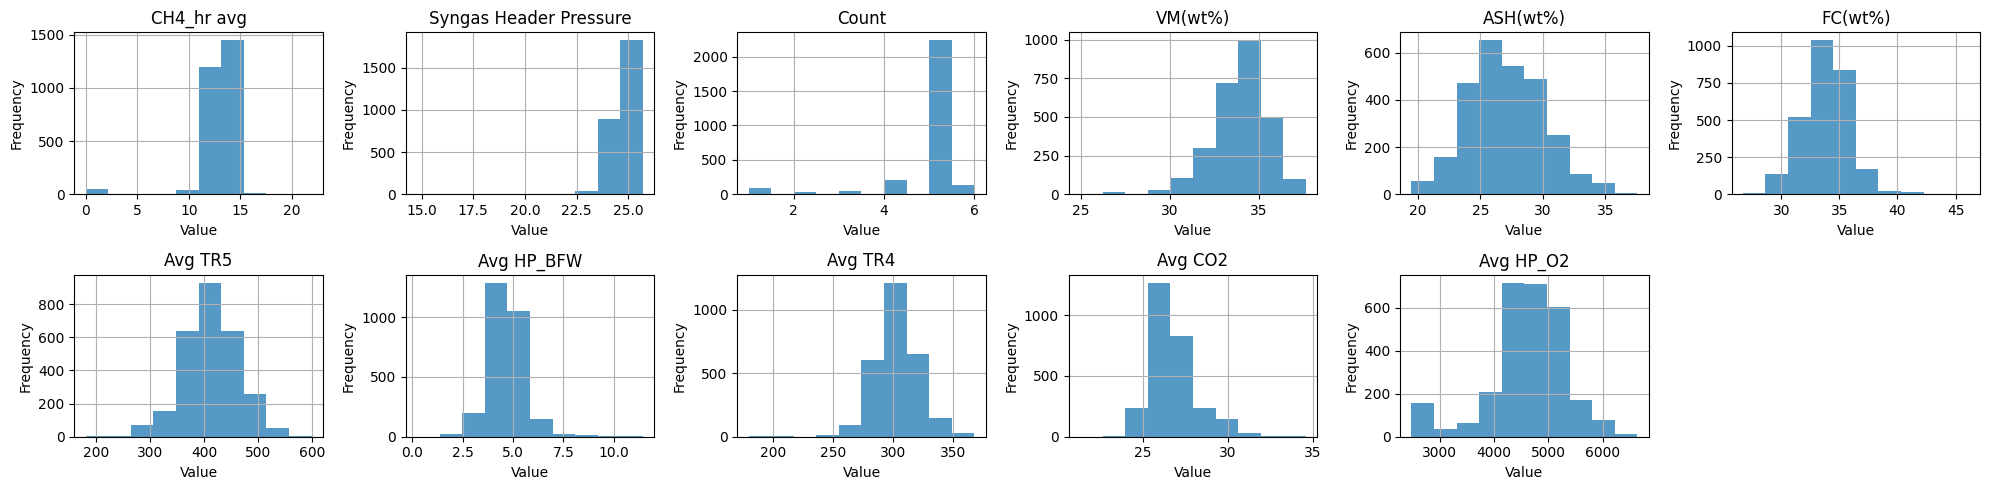

In [18]:
# Plot histograms for each column

ncols = len(df.columns)//2 + len(df.columns)%2
fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(20, 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=10, alpha=0.75)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

if len(df.columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

It can be observed that the data is somewhat skewed

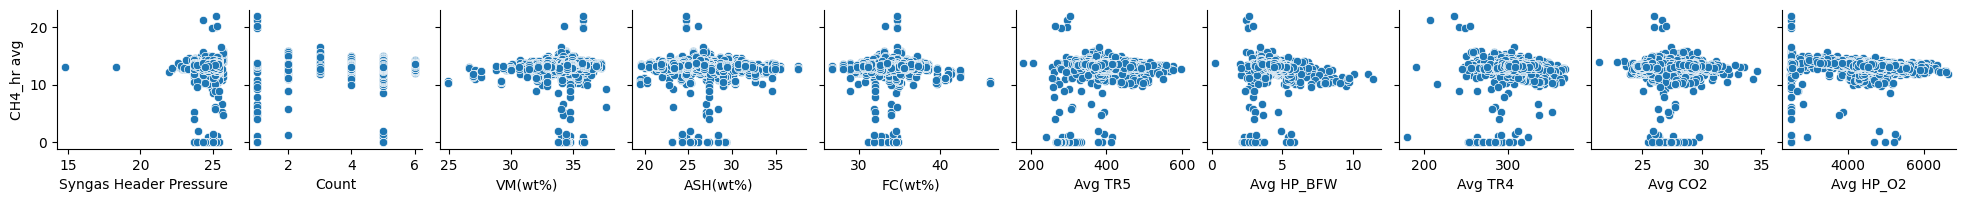

In [19]:
#Plotting the pair plot to check the relationship among the different parameters

sns.pairplot(df, y_vars=['CH4_hr avg'], x_vars=df.columns.drop('CH4_hr avg'), height=2, aspect=1)

plt.show()

<Figure size 1000x800 with 0 Axes>

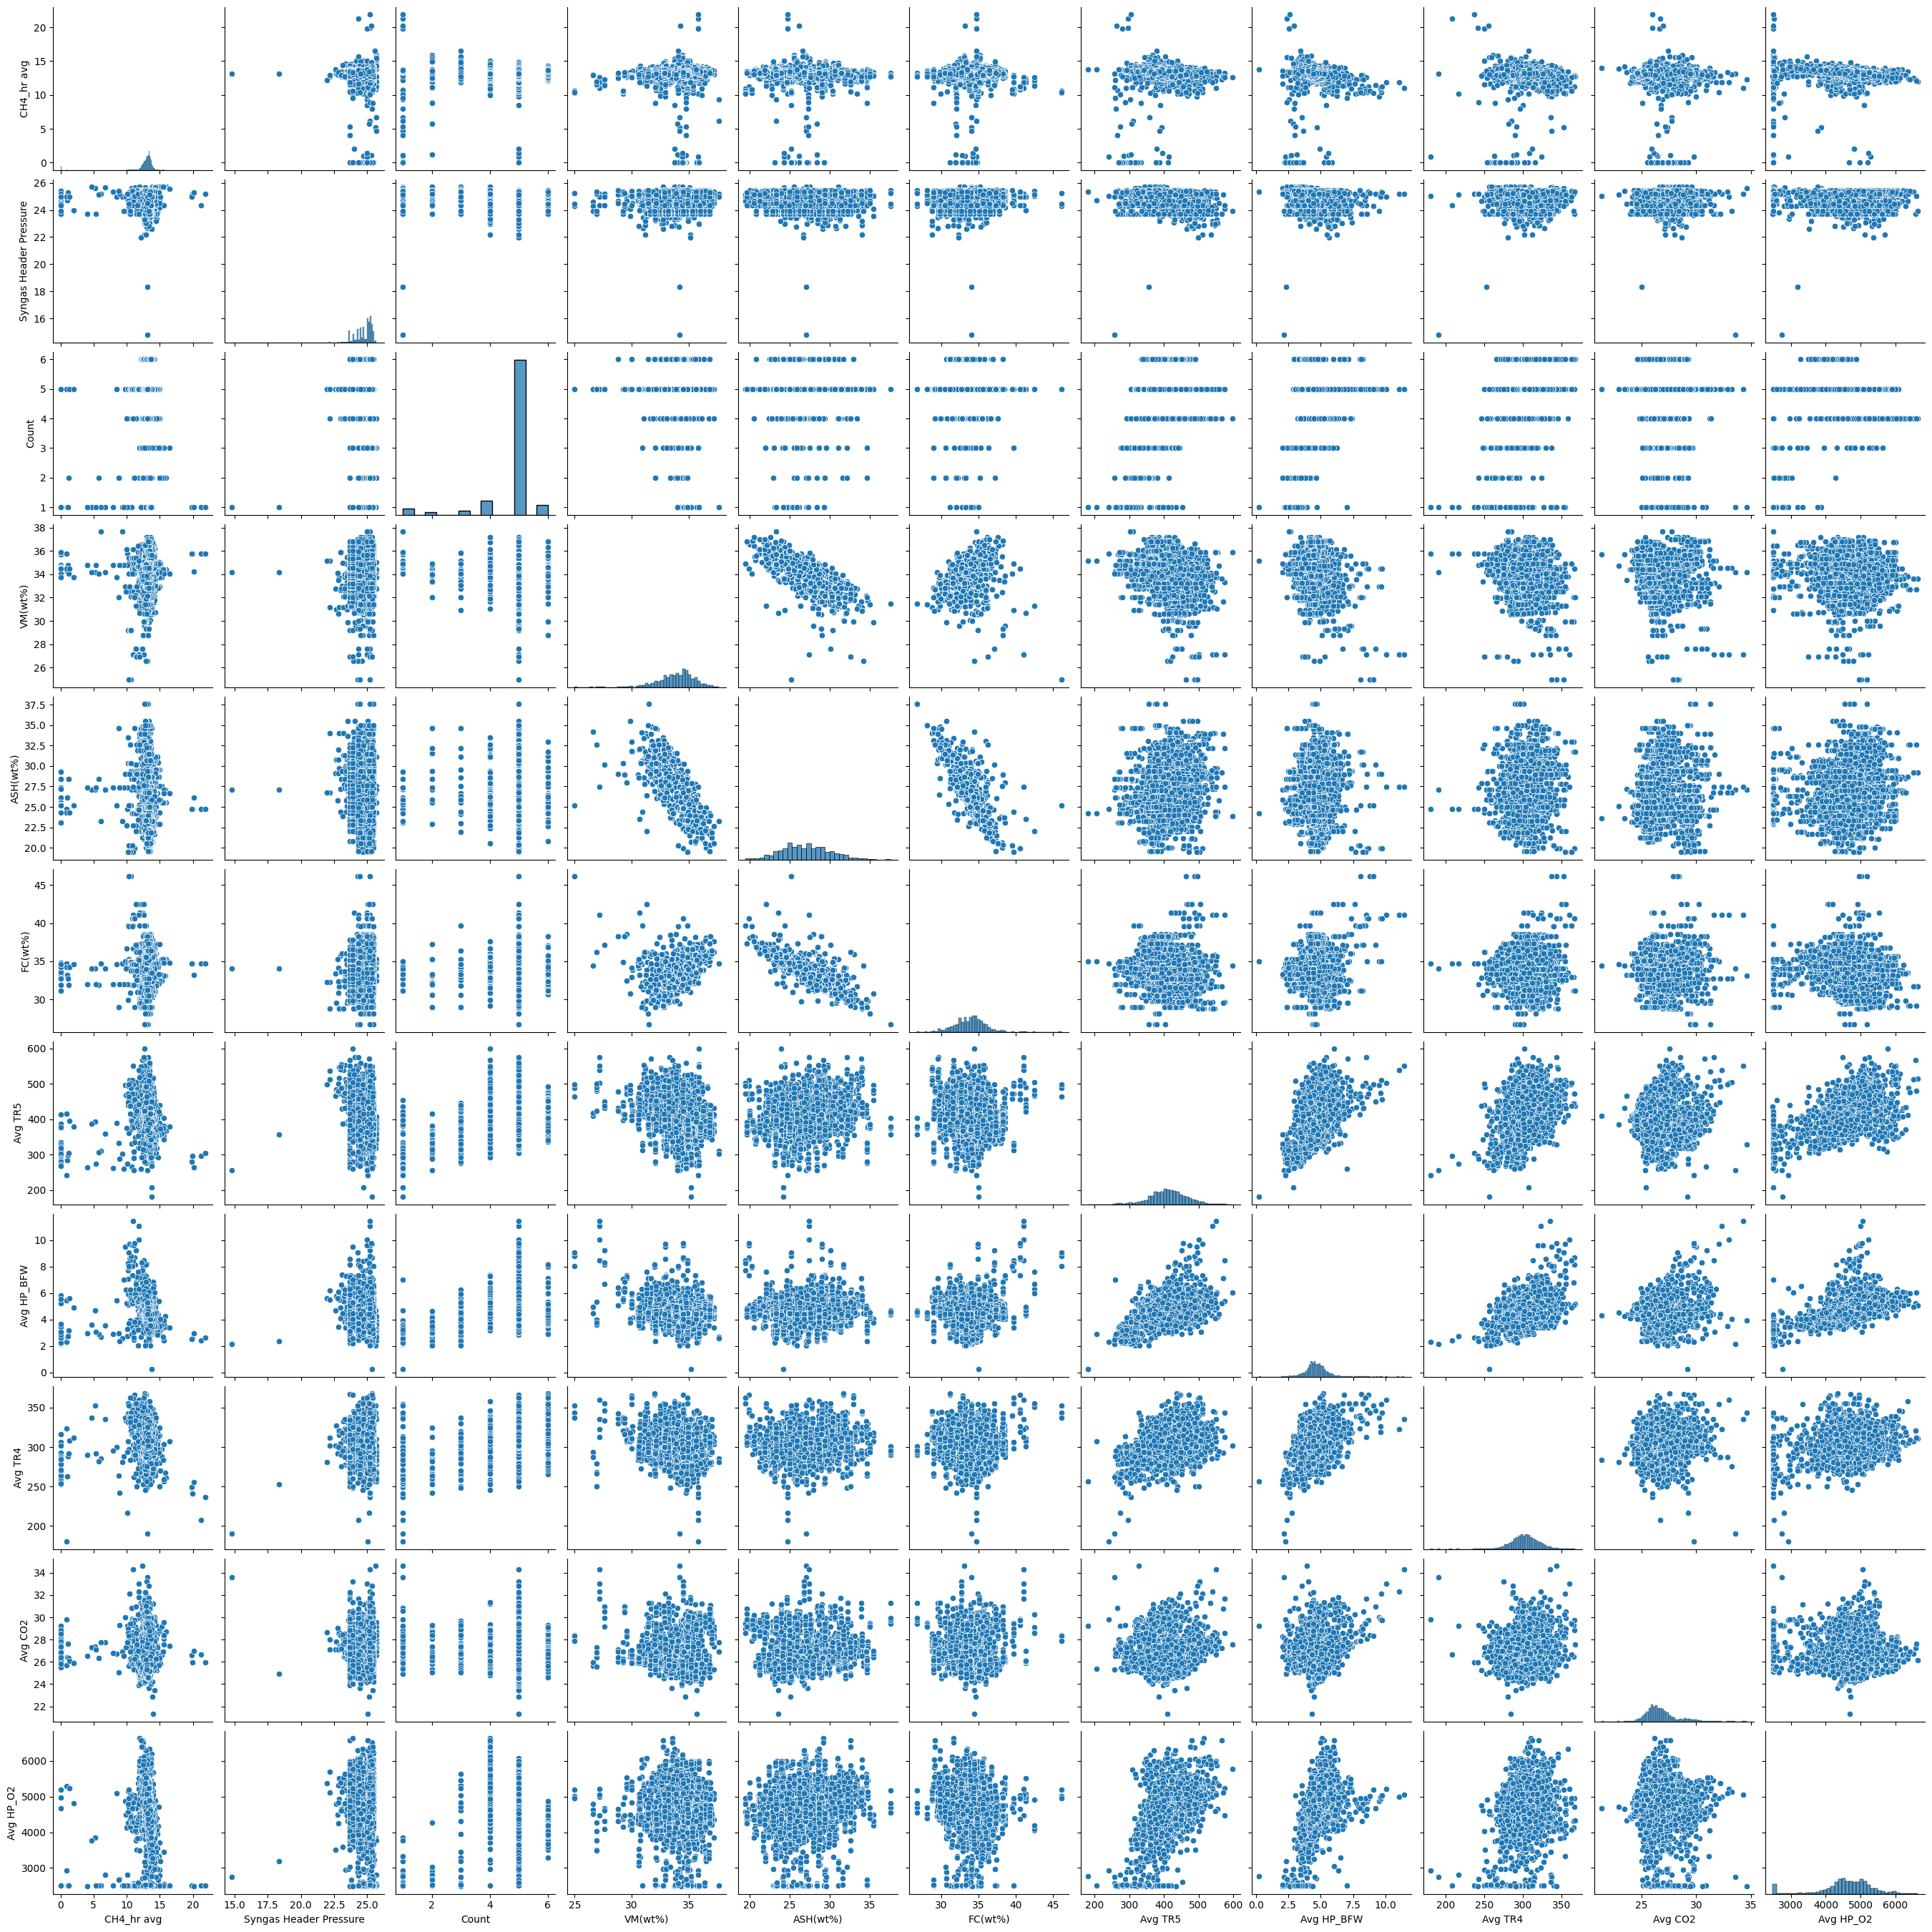

In [20]:
plt.figure(figsize=(10, 8))

sns.pairplot(df)
plt.show()

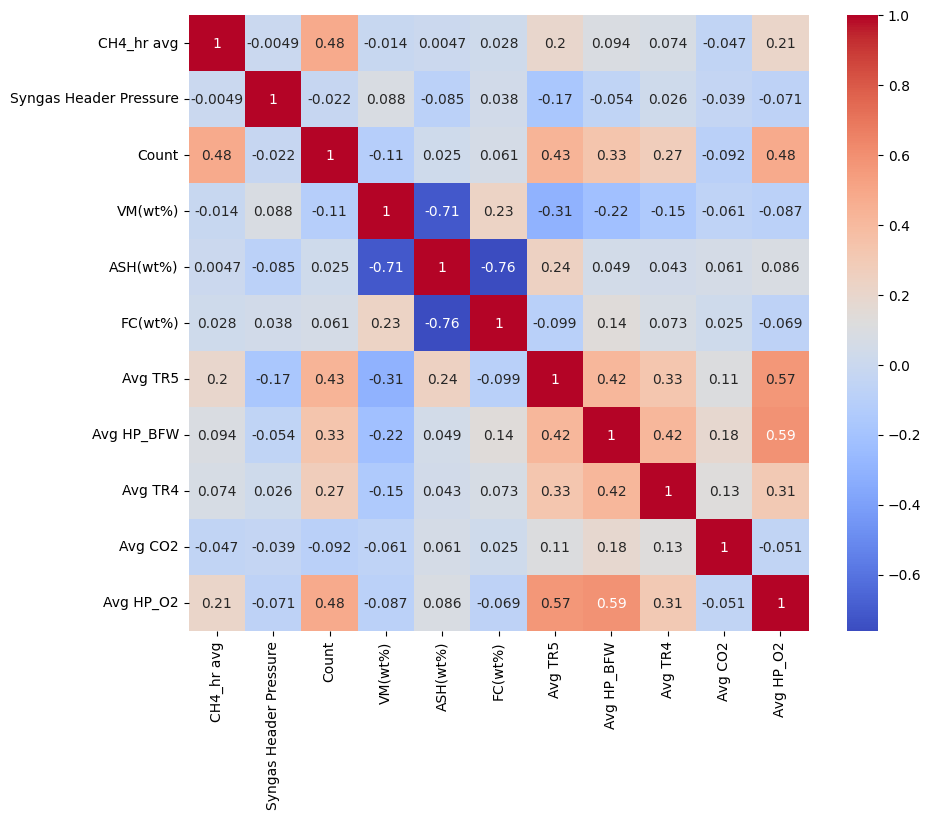

In [21]:
#calculating correlation matrix for the data
corr_mat = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

plt.show()

In [22]:
#important parameters according to correlation

correlation_with_target = corr_mat['CH4_hr avg'].abs().sort_values(ascending=False)
print(correlation_with_target)

CH4_hr avg                1.000000
Count                     0.483044
Avg HP_O2                 0.210596
Avg TR5                   0.197118
Avg HP_BFW                0.094127
Avg TR4                   0.073779
Avg CO2                   0.046686
FC(wt%)                   0.028311
VM(wt%)                   0.014011
Syngas Header Pressure    0.004919
ASH(wt%)                  0.004734
Name: CH4_hr avg, dtype: float64


In [23]:
#Separating Features & Target

X = df.drop('CH4_hr avg',axis=1)
y = df['CH4_hr avg']

In [24]:
X

,Syngas Header Pressure,Count,VM(wt%),ASH(wt%),FC(wt%),Avg TR5,Avg HP_BFW,Avg TR4,Avg CO2,Avg HP_O2
0,22.193833,4.0,35.15,26.75,32.28,511.852167,6.230333,301.898833,27.135292,5697.218333
1,21.966167,5.0,35.15,26.75,32.28,498.310067,5.630733,280.516933,28.675533,5372.799200
2,24.495500,5.0,35.15,26.75,32.28,491.921533,5.510900,301.432733,26.369967,5130.564100
3,24.680500,5.0,35.15,26.75,32.28,487.500133,5.471733,294.388567,27.072800,4926.512900
4,24.084833,5.0,33.30,28.54,32.28,509.515333,5.785400,293.165333,27.593433,5045.142400
...,...,...,...,...,...,...,...,...,...,...
2752,24.708252,5.0,35.66,25.92,33.45,414.695686,4.038034,300.599136,29.387188,4612.633206
2753,24.994046,5.0,35.66,25.92,33.45,392.961530,4.421848,308.032909,28.911742,4321.878770
2754,25.141703,5.0,32.15,29.39,31.20,386.366665,4.432533,300.522528,28.803951,4439.261580
2755,24.670947,5.0,32.15,29.39,31.20,374.363907,4.634457,301.644080,29.255461,4383.122669


In [25]:
y

0       12.688833
1       12.171667
2       12.344333
3       13.030000
4       13.169333
          ...    
2752    13.553059
2753    13.735909
2754    13.452631
2755    13.253233
2756    13.143982
Name: CH4_hr avg, Length: 2757, dtype: float64

In [26]:
#log transformation

X_log = np.log(X+1)
y_log = np.log(y+1)

In [27]:
#Splitting train and test data

from sklearn.model_selection import train_test_split

X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

Using Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_log,y_train_log)
y_pred_lr = lr_model.predict(X_test_log)

lr_coefficients = lr_model.coef_
lr_intercept = lr_model.intercept_

In [29]:
# Print the linear regression function in the log-transformed space
print("The Linear regression function in log-transformed space is:")
function = f"log(y+1) = {lr_intercept:.5f}"

for i, coef in enumerate(lr_coefficients):
    function += f" + ({coef:.5f}*log({X.columns[i]}+1))"
print(function)

The Linear regression function in log-transformed space is:
log(y+1) = -2.51950 + (-0.23523*log(Syngas Header Pressure+1)) + (0.86743*log(Count+1)) + (0.65019*log(VM(wt%)+1)) + (0.34590*log(ASH(wt%)+1)) + (0.39486*log(FC(wt%)+1)) + (0.10683*log(Avg TR5+1)) + (0.02699*log(Avg HP_BFW+1)) + (-0.18181*log(Avg TR4+1)) + (0.11390*log(Avg CO2+1)) + (-0.06056*log(Avg HP_O2+1))


In [30]:
from sklearn.metrics import mean_squared_error,r2_score

lr_rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_lr))
lr_r2 = r2_score(y_test_log,y_pred_lr)

print('RMSE: ',lr_rmse)
print('R2 Score: ',lr_r2)

RMSE:  0.2946732949912019
R2 Score:  0.45209239662322076


Sample Calculations for Linear Regression Model

In [31]:
sample_index = 0

# Check if sample_index is valid
if sample_index >= len(X_train_log):
    raise IndexError(f"sample_index {sample_index} is out of bounds for the input data with {len(X)} rows.")

sample_input = X_train_log.iloc[sample_index]

sample_input_reshaped = sample_input.values.reshape(1, -1)
log_predicted_value = lr_model.predict(sample_input_reshaped)

predicted_value = np.exp(log_predicted_value) - 1
print(f"Predicted value (CH4_hr avg): {predicted_value[0]}")

actual_value = np.exp(y_train_log.iloc[sample_index]) - 1
print(f"Actual value (CH4_hr avg): {actual_value}")

Predicted value (CH4_hr avg): 12.863951315707027
Actual value (CH4_hr avg): 13.457893482844034


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Using Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_log)
X_test_poly = poly.transform(X_test_log)

In [33]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_log)
y_pred_poly = poly_model.predict(X_test_poly)

# Get the coefficients
poly_coefficients = poly_model.coef_
poly_intercept = poly_model.intercept_

feature_names = X.columns
terms = poly.get_feature_names_out(feature_names)

In [34]:
# Print the polynomial regression function
poly_function = f"log(y+1) = {poly_intercept:.2f}"

# Adjust terms to include the original feature names with the log transformation
for coef, term in zip(poly_coefficients, terms):
    transformed_term = term
    for feature in feature_names:
        # Adjust terms to match the required format (feature + 1) instead of log(feature)
        transformed_term = transformed_term.replace(feature, f"({feature}+1)")
    
    if coef > 1 or coef < -1:
        poly_function += f" + ({coef:.2f}*log({transformed_term}))"
print(poly_function)

log(y+1) = 97001.02 + (-7989.67*log((Syngas Header Pressure+1))) + (-15039.72*log((Count+1))) + (-26427.22*log((VM(wt%)+1))) + (-6525.89*log((ASH(wt%)+1))) + (-11123.17*log((FC(wt%)+1))) + (-7242.50*log((Avg TR5+1))) + (7004.25*log((Avg HP_BFW+1))) + (-3470.96*log((Avg TR4+1))) + (-18495.00*log((Avg CO2+1))) + (3527.16*log((Avg HP_O2+1))) + (2281.46*log((Syngas Header Pressure+1)^2)) + (1827.70*log((Syngas Header Pressure+1) (Count+1))) + (-1470.81*log((Syngas Header Pressure+1) (VM(wt%)+1))) + (575.92*log((Syngas Header Pressure+1) (ASH(wt%)+1))) + (-612.33*log((Syngas Header Pressure+1) (FC(wt%)+1))) + (718.50*log((Syngas Header Pressure+1) (Avg TR5+1))) + (-866.36*log((Syngas Header Pressure+1) (Avg HP_BFW+1))) + (-837.60*log((Syngas Header Pressure+1) (Avg TR4+1))) + (3017.92*log((Syngas Header Pressure+1) (Avg CO2+1))) + (-552.79*log((Syngas Header Pressure+1) (Avg HP_O2+1))) + (-111.11*log((Count+1)^2)) + (5964.38*log((Count+1) (VM(wt%)+1))) + (899.33*log((Count+1) (ASH(wt%)+1)))

In [35]:
poly_rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_poly))
poly_r2 = r2_score(y_test_log, y_pred_poly)

print('RMSE:',poly_rmse)
print('R2 Score:',poly_r2)

RMSE: 0.19288490196196537
R2 Score: 0.765241007061623


Sample Calculations for Polynomial regression Model

In [36]:
sample_index = 0

# Check if sample_index is valid
if sample_index >= len(X_train_log):
    raise IndexError(f"sample_index {sample_index} is out of bounds for the input data with {len(X)} rows.")

sample_input = X_train_log.iloc[sample_index]

sample_input_reshaped = sample_input.values.reshape(1, -1)
sample_input_poly = poly.transform(sample_input_reshaped)
log_predicted_value = poly_model.predict(sample_input_poly)

predicted_value = np.exp(log_predicted_value) - 1
print(f"Predicted value (CH4_hr avg): {predicted_value[0]}")

actual_value = np.exp(y_train_log.iloc[sample_index]) - 1
print(f"Actual value (CH4_hr avg): {actual_value}")

Predicted value (CH4_hr avg): 12.6716969904135
Actual value (CH4_hr avg): 13.457893482844034


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [37]:
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grids for each regressor
# param_grids = {
#     'Linear Regression': {},
#     'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
#     'Lasso Regression': {'alpha': [0.01, 0.1, 1.0, 10.0]},
#     'ElasticNet Regression': {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]},
#     'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
#     'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
#     'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
#     'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
#     'KNN Regression': {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
# }

# # Initialize regressors
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor

# regressors = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'ElasticNet Regression': ElasticNet(),
#     'SVR': SVR(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor(),
#     'KNN Regression': KNeighborsRegressor()
# }

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# # Perform grid search for each regressor
# best_estimators = {}
# for name, reg in regressors.items():
#     grid_search = GridSearchCV(reg, param_grids[name], cv=5, scoring='neg_mean_squared_error')
#     grid_search.fit(X_train, y_train)
#     best_estimators[name] = grid_search.best_estimator_
#     print(f'{name} best parameters: {grid_search.best_params_}')

Best Paramters for the different models

Linear Regression best parameters: {}\
Ridge Regression best parameters: {'alpha': 10.0}\
Lasso Regression best parameters: {'alpha': 0.01}\
ElasticNet Regression best parameters: {'alpha': 0.01, 'l1_ratio': 0.9}\
SVR best parameters: {'C': 10.0, 'kernel': 'rbf'}\
Decision Tree best parameters: {'max_depth': 10, 'min_samples_split': 2}\
Random Forest best parameters: {'max_depth': 10, 'n_estimators': 100}\
Gradient Boosting best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}\
KNN Regression best parameters: {'n_neighbors': 3, 'weights': 'distance'}

In [38]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Initialize regressors
# regressors = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(alpha=10),
#     'Lasso Regression': Lasso(alpha=0.01),
#     'ElasticNet Regression': ElasticNet(alpha=0.01,l1_ratio=0.1),
#     'SVR': SVR(C=10,kernel='rbf'),
#     'Decision Tree': DecisionTreeRegressor(max_depth=10,min_samples_split=2),
#     'Random Forest': RandomForestRegressor(max_depth=10,n_estimators=100),
#     'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=200),
#     'KNN Regression': KNeighborsRegressor(n_neighbors=3,weights='distance')
# }

# # Train and evaluate each regressor
# for name, reg in regressors.items():
#     reg.fit(X_train, y_train)
#     y_pred = reg.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f'{name} - MSE: {mse:.5f}, R2: {r2:.5f}')

Linear Regression - MSE: 3.09061, R2: 0.33720\
Ridge Regression - MSE: 3.09337, R2: 0.33661\
Lasso Regression - MSE: 3.09281, R2: 0.33673\
ElasticNet Regression - MSE: 3.09628, R2: 0.33599\
SVR - MSE: 0.65939, R2: 0.85859\
Decision Tree - MSE: 1.81120, R2: 0.61158\
Random Forest - MSE: 0.89529, R2: 0.80800\
Gradient Boosting - MSE: 0.84573, R2: 0.81863\
KNN Regression - MSE: 0.67494, R2: 0.85525

SVR is the best performing Model for this data

SVR Model

In [39]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_pred = svr_model.predict(X_test_scaled)

svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared: {svr_r2}")

Mean Squared Error: 0.6593875885801205
R-squared: 0.858590953948575


Sample Calculations for SVR Model

In [40]:
sample_index = 0

# Check if sample_index is valid
if sample_index >= len(X_train):
    raise IndexError(f"sample_index {sample_index} is out of bounds for the input data with {len(X)} rows.")

sample_input = X_train.iloc[sample_index]
print("Sample input row:")
print(sample_input)

sample_input_reshaped = sample_input.values.reshape(1, -1)
predicted_value = svr_model.predict(sample_input_reshaped)

print(f"Predicted value (CH4_hr avg): {predicted_value[0]}")

actual_value = y_train.iloc[sample_index]
print(f"Actual value (CH4_hr avg): {actual_value}")

Sample input row:
Syngas Header Pressure      24.983695
Count                        5.000000
VM(wt%)                     32.790000
ASH(wt%)                    28.580000
FC(wt%)                     33.690000
Avg TR5                    339.123179
Avg HP_BFW                   4.454954
Avg TR4                    293.782385
Avg CO2                     25.626283
Avg HP_O2                 4424.473136
Name: 809, dtype: float64
Predicted value (CH4_hr avg): 12.516897935362765
Actual value (CH4_hr avg): 13.457893482844035


Custom Value Calculations for SVR Model

In [41]:
sample_input = {
    'Count': 7,
    'Syngas Header Pressure': 24,
    'Avg TR5': 500,
    'Avg HP_BFW': 5,
    'Avg TR4': 300,
    'Avg CO2': 27,
    'Avg HP_O2': 5000,
    'VM(wt%)': 35,
    'ASH(wt%)': 25,
    'FC(wt%)': 32
}

# Convert the sample input to a DataFrame
sample_df = pd.DataFrame([sample_input])[X_train.columns]

# Standardize the sample input
sample_scaled = scaler.transform(sample_df)

# Make the prediction
sample_prediction = svr_model.predict(sample_scaled)

print(f"Prediction for the sample: {sample_prediction[0]}")

Prediction for the sample: 12.910796126876905


In [42]:
#Saving the model for the deployment
import pickle

with open('svr_model.pkl', 'wb') as model_file:
    pickle.dump(svr_model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)